# 1. Student Performance EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/raw.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
df.shape

(1000, 8)

## 1.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Here is not any missing values

## 1.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

Here is not any Duplicate Values

# 1.3 Check Data Types

In [8]:
#Check Null and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

# 1.5 Check Statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [11]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# print columns
print("We have {} numerical columns : {}".format(len(numeric_features), numeric_features))
print("We have {} categorical columns : {}".format(len(categorical_features), categorical_features))

We have 3 numerical columns : ['math score', 'reading score', 'writing score']
We have 5 categorical columns : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:     ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['completed' 'none']


# 1.6 Adding Columns for "Total Score" and "Average"

In [13]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [14]:
math_full = (df['math score'] == 100).sum()
#math_full = len(df[df['math score'] == 100])     #gives same output as above
#math_full = df[df['math score'] == 100]['Average'].count() #gives same output as above
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()

print(f"Number of students with 100 Marks in Math is : {math_full}")
print(f"Number of students with 100 Marks in Reading is : {reading_full}")
print(f"Number of students with 100 Marks in Writing is : {writing_full}")

Number of students with 100 Marks in Math is : 9
Number of students with 100 Marks in Reading is : 10
Number of students with 100 Marks in Writing is : 13


In [15]:
math_less_than_20 = (df['math score'] <= 20).sum()
#math_less_than_20 = df[df['math score'] <= 20]['Average'].count()   ##gives same output as above
reading_less_than_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_than_20 = df[df['writing score'] <= 20]['Average'].count()

print(f"Number of students with less than 20 Marks in Math is : {math_less_than_20}")
print(f"Number of students with less than 20 Marks in Reading is : {reading_less_than_20}")
print(f"Number of students with less than 20 Marks in Writing is : {writing_less_than_20}")

Number of students with less than 20 Marks in Math is : 2
Number of students with less than 20 Marks in Reading is : 0
Number of students with less than 20 Marks in Writing is : 2


# 2 Data Visualization

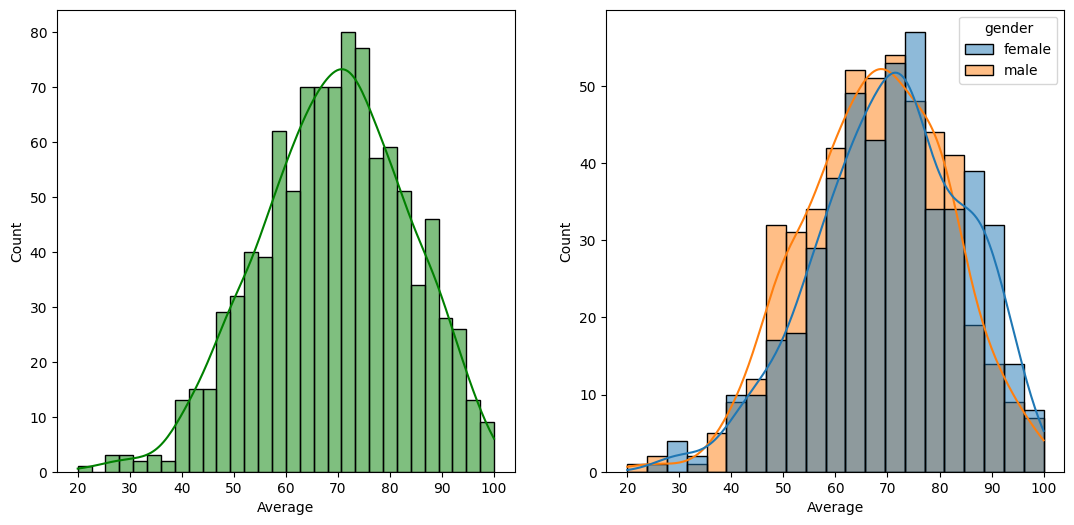

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()


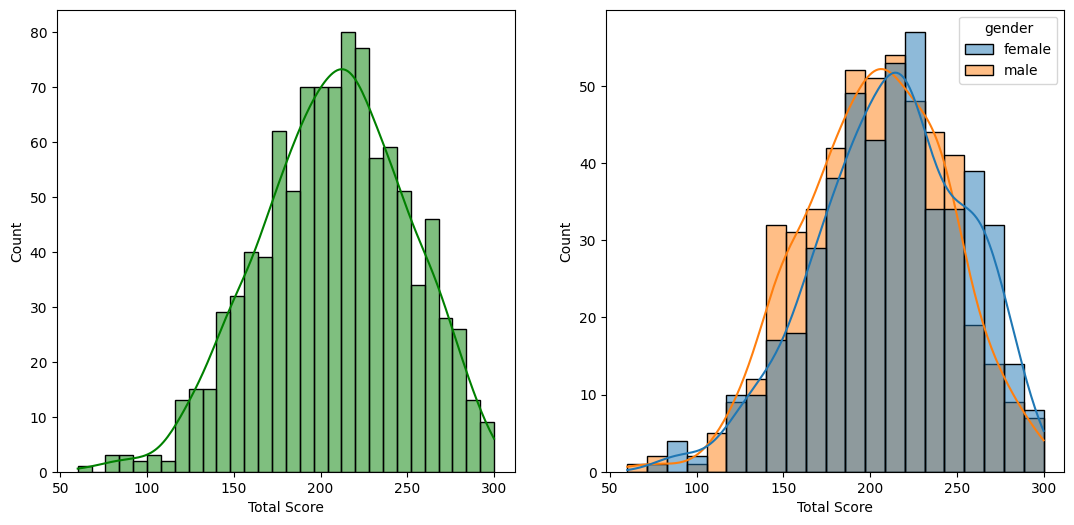

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(13,6))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

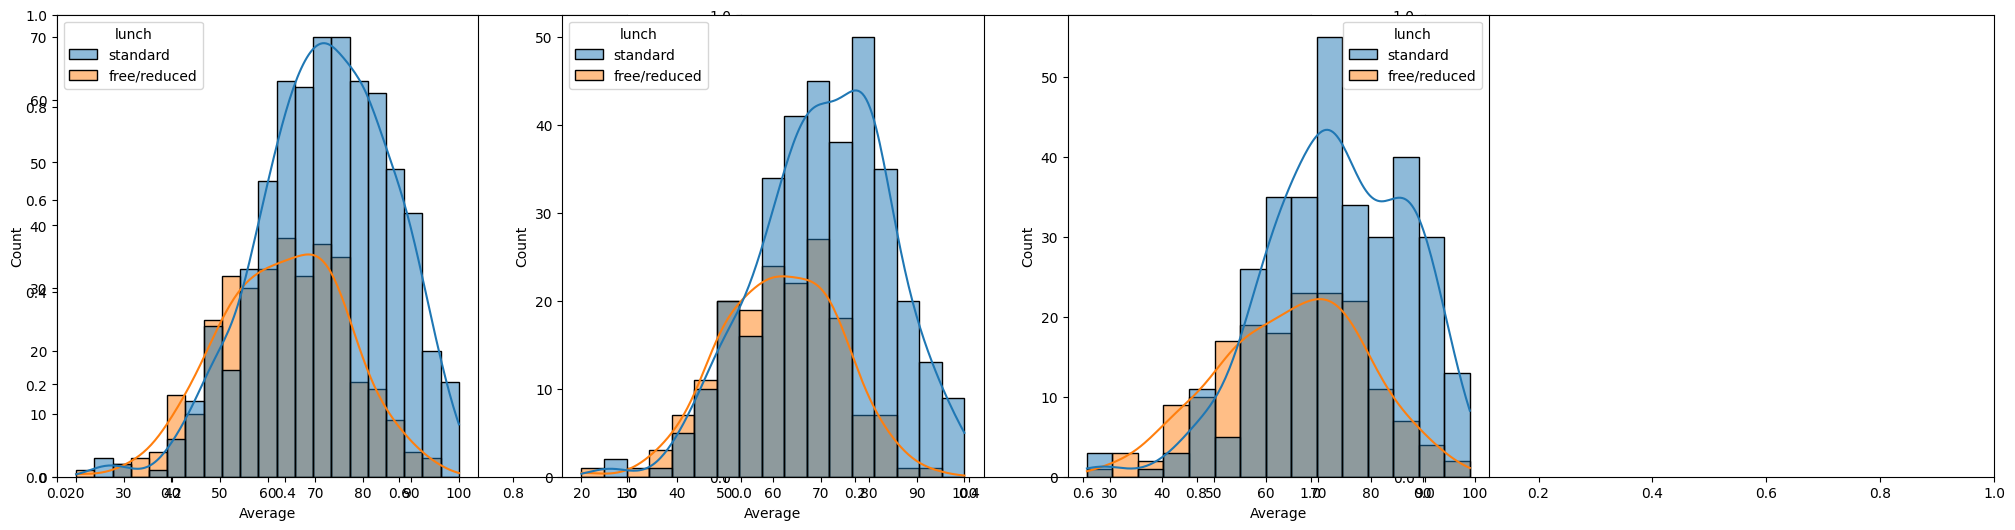

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.show()

Insight

Standard lunch helps performs well in exams

Standard lunch helps performs well in exams for both male and female

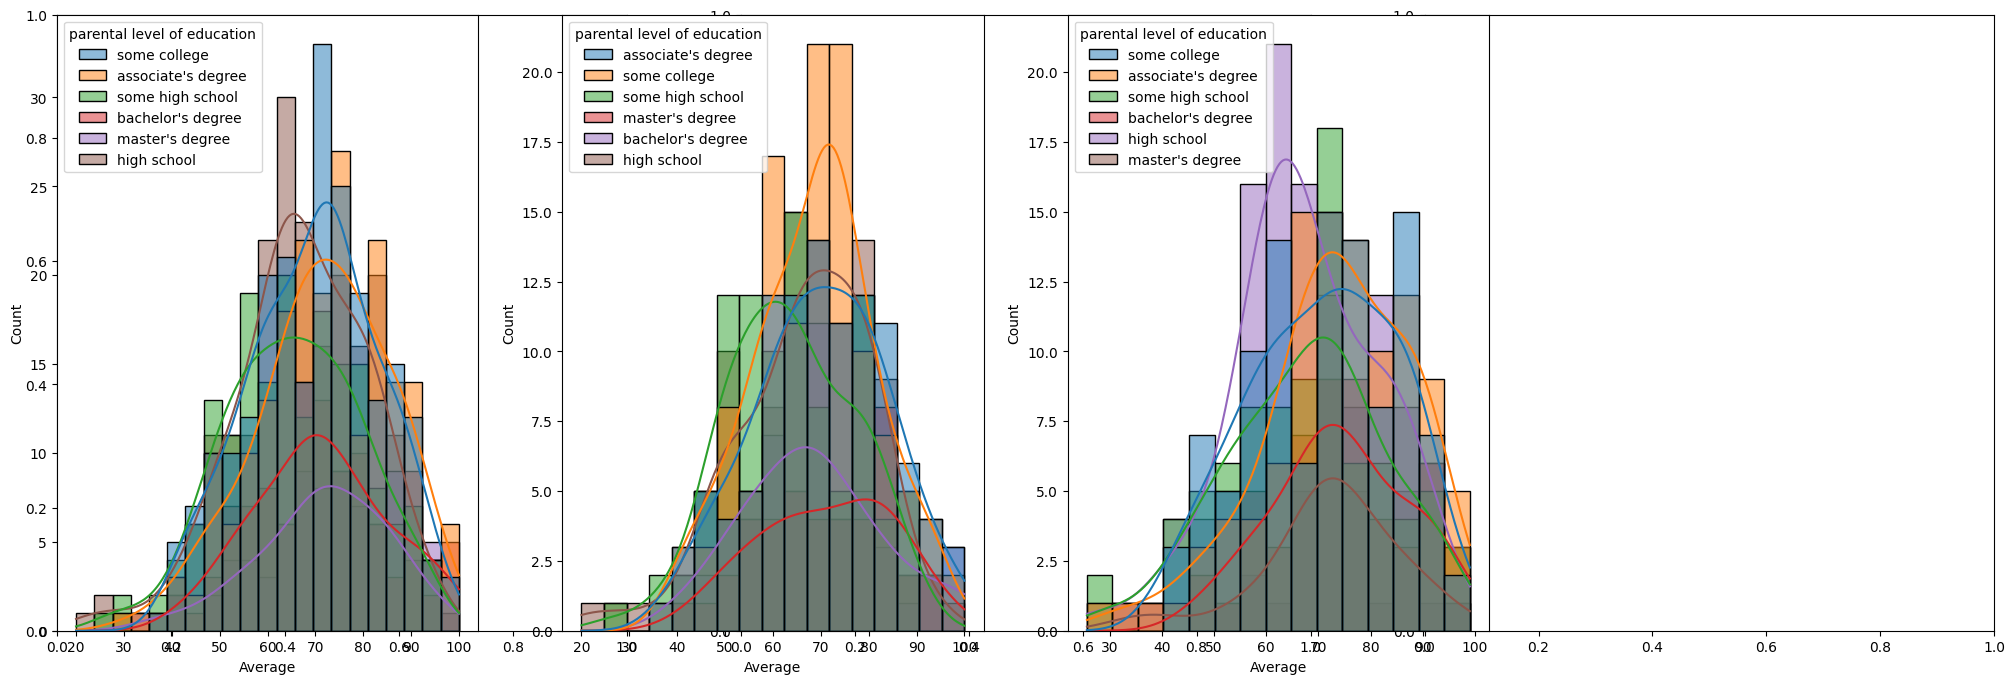

In [19]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

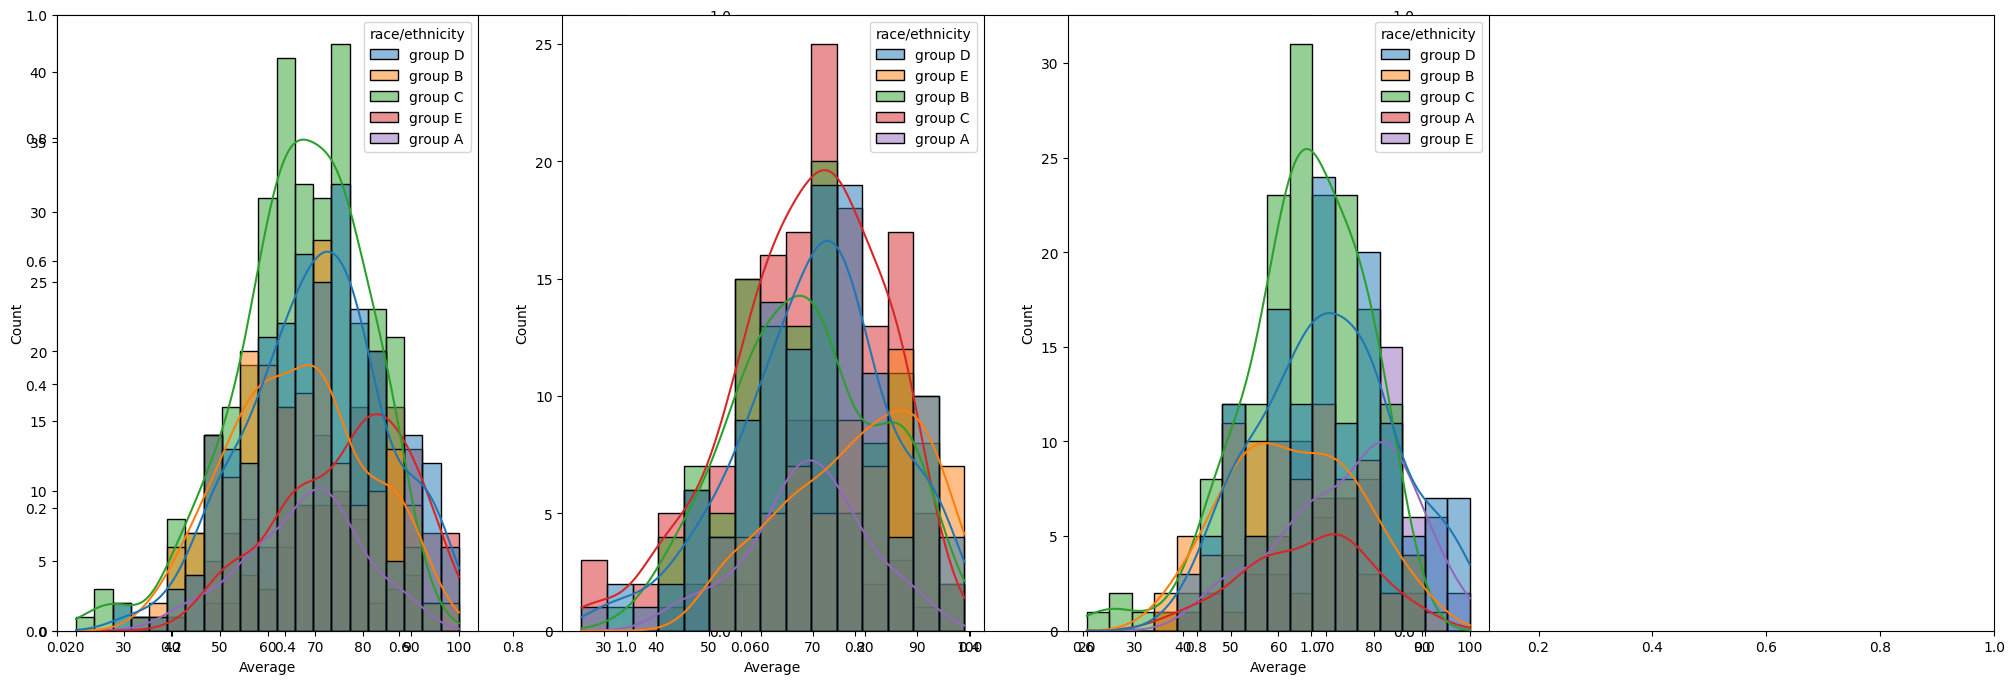

In [20]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

Insight

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

# 2.2 Maximumum score of students in all three subjects

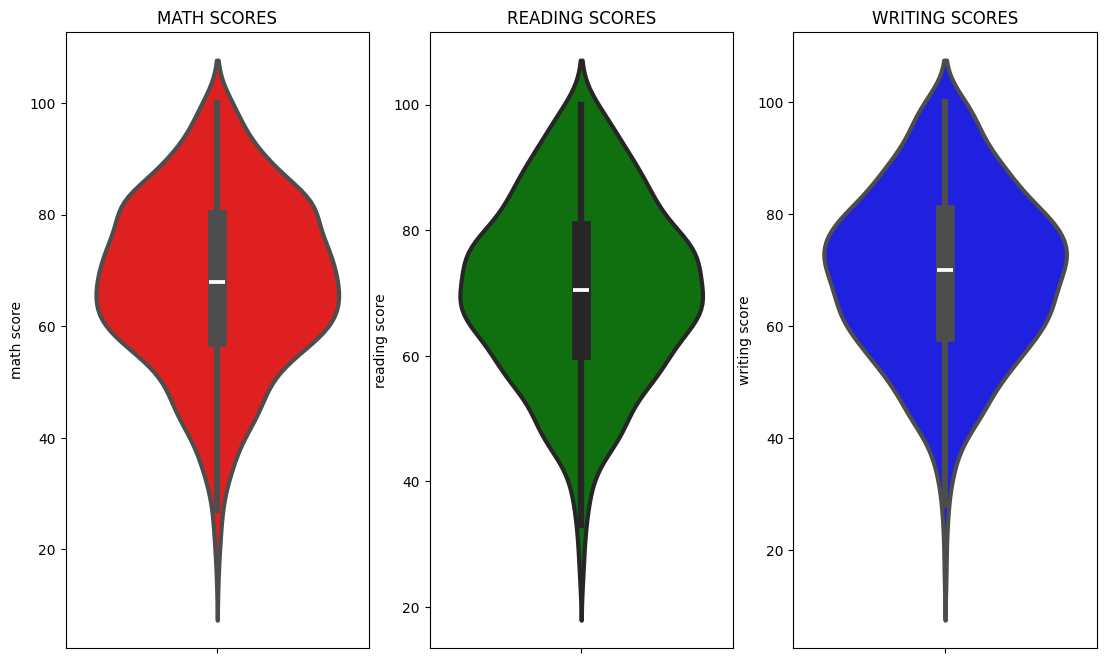

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insight

From the above three plots its clearly visible that most of the students score in between 60-80

# 2.3 multivariate analysis using pieplot

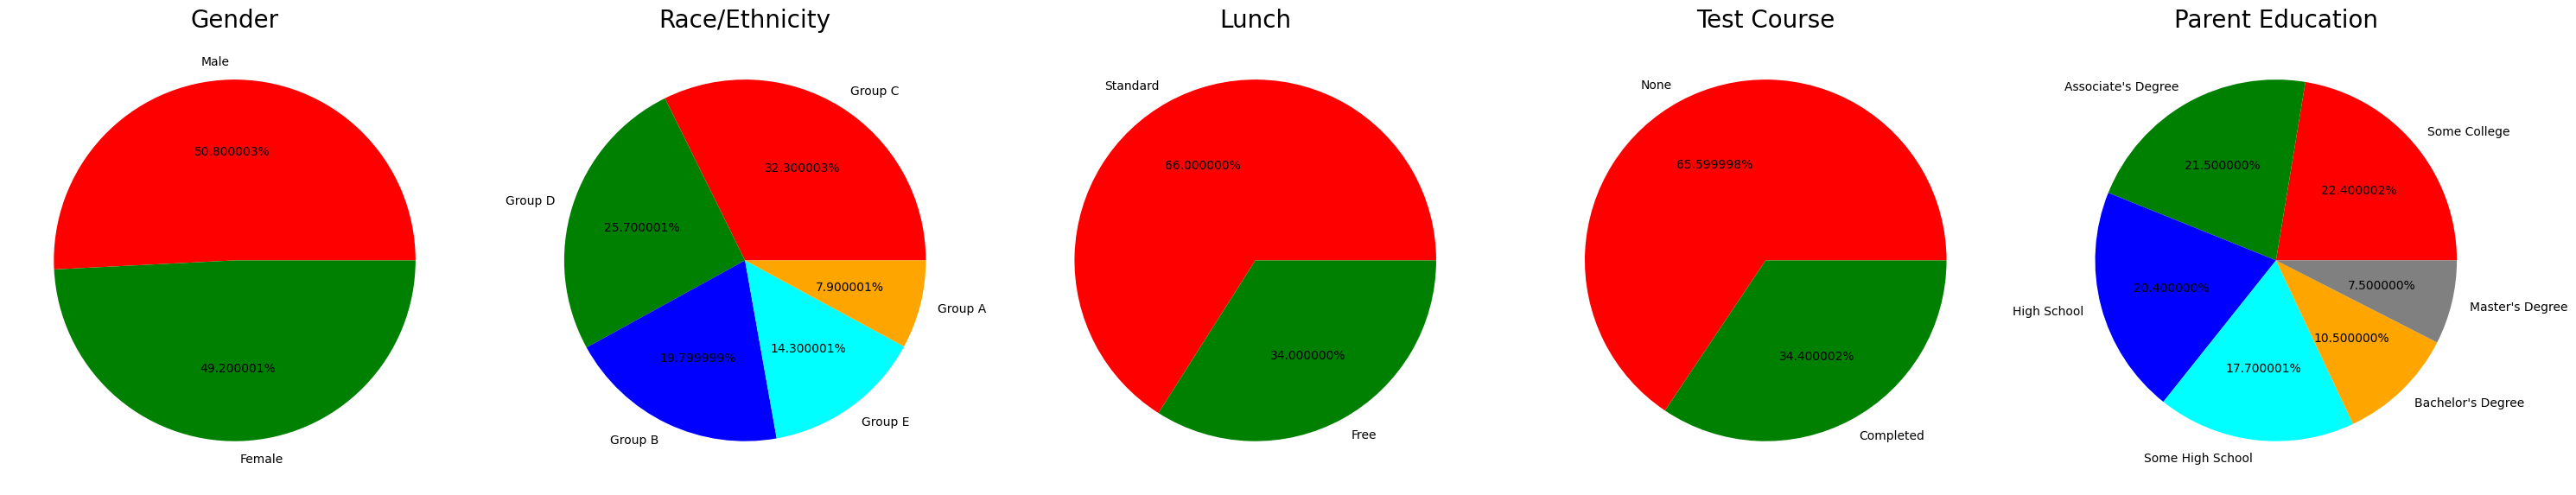

In [22]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Male','Female'
colors = ['red','green']

plt.pie(size, labels=labels, colors=colors, autopct='%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
colors = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, labels=labels, colors=colors, autopct='%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red','green']

plt.pie(size, labels=labels, colors=colors, autopct='%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(154)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors = ['red','green']

plt.pie(size, labels=labels, colors=colors, autopct='%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')


plt.subplot(155)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
colors = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, labels=labels, colors=colors, autopct='%2f%%')
plt.title('Parent Education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insight

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# 2.4 Features Wise Visualization

## 2.4.1 GENDER COLUMN

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

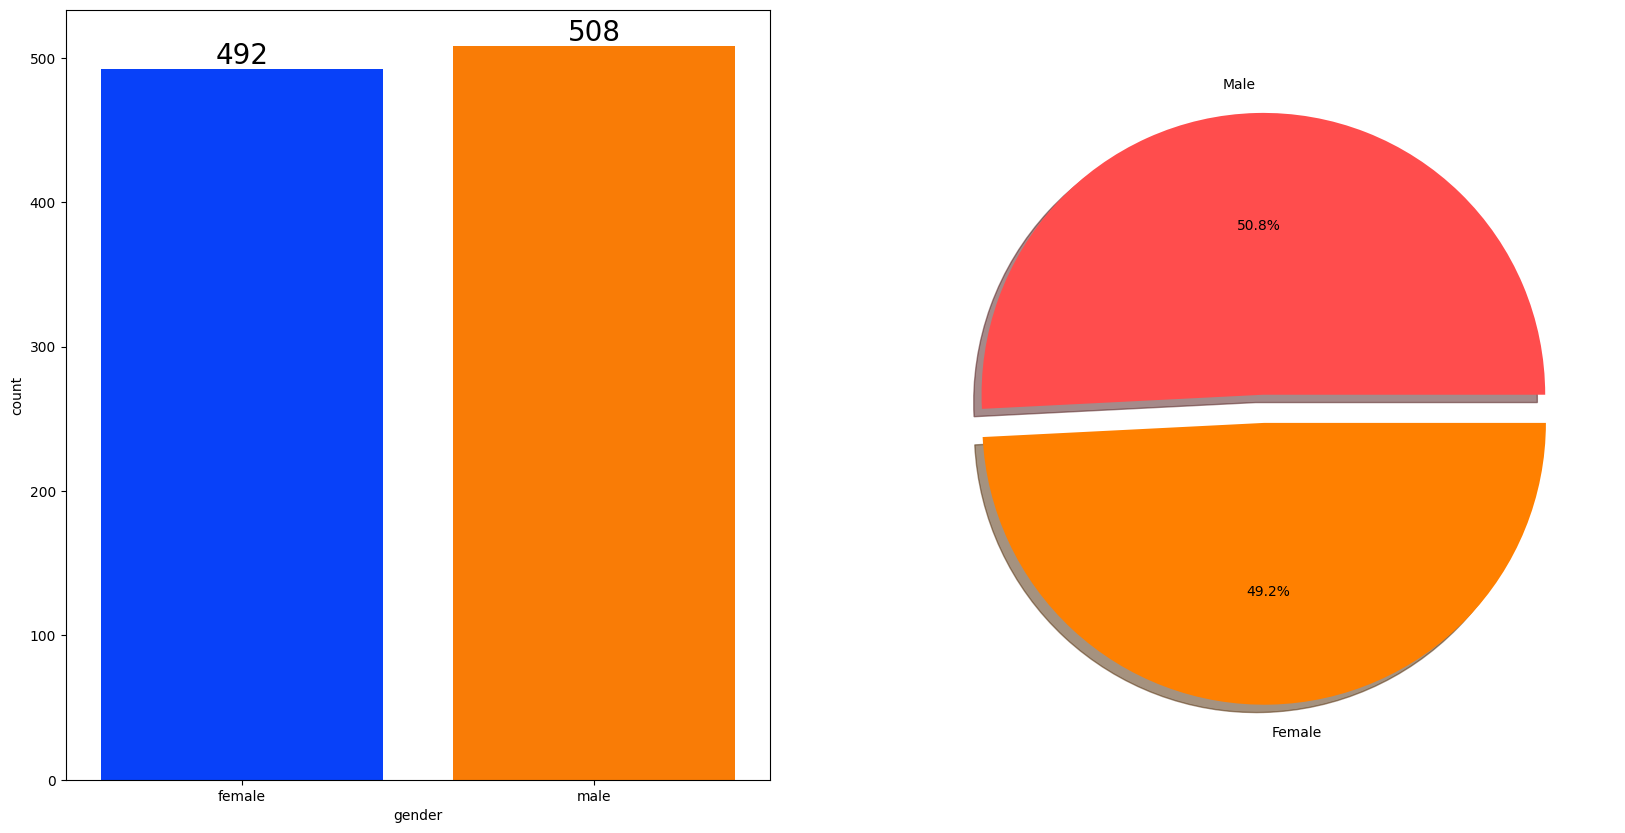

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x=df['gender'], palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insight

Gender has balanced data with female students are 492 (49%) and male students are 508 (51%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [24]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math score,reading score,writing score,Total Score,Average
gender,,,,,
female,64.77439,73.473577,73.439024,211.686992,70.562331
male,70.75000,67.387795,64.976378,203.114173,67.704724


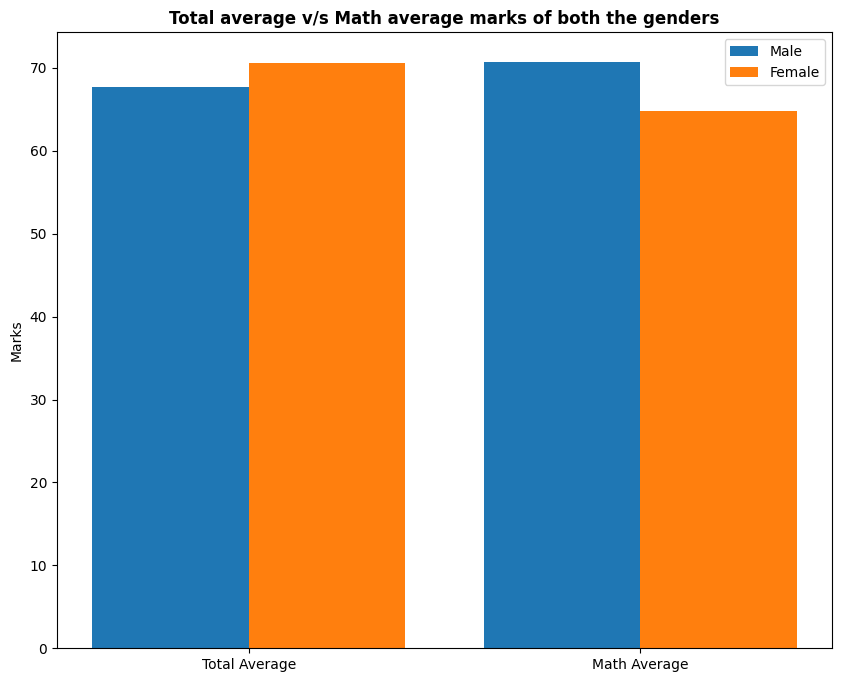

In [25]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X) 
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insight

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

## 2.4.2 RACE/EHNICITY COLUMN

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

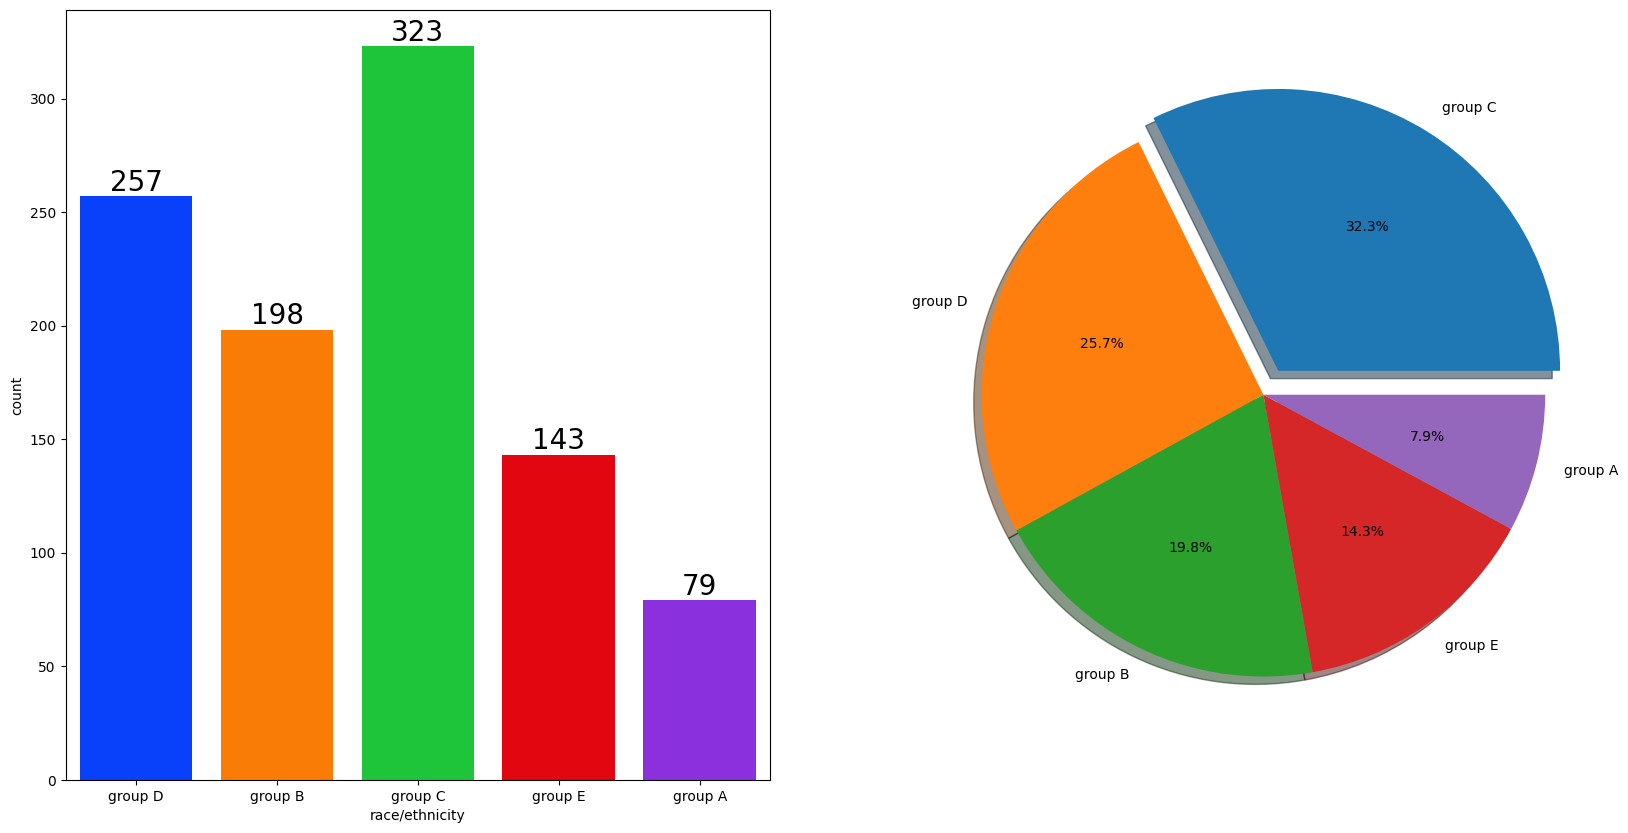

In [26]:
fig, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['race/ethnicity'],palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insight

Most of the student belonging from group C /group D.

Lowest number of students belong to group A.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

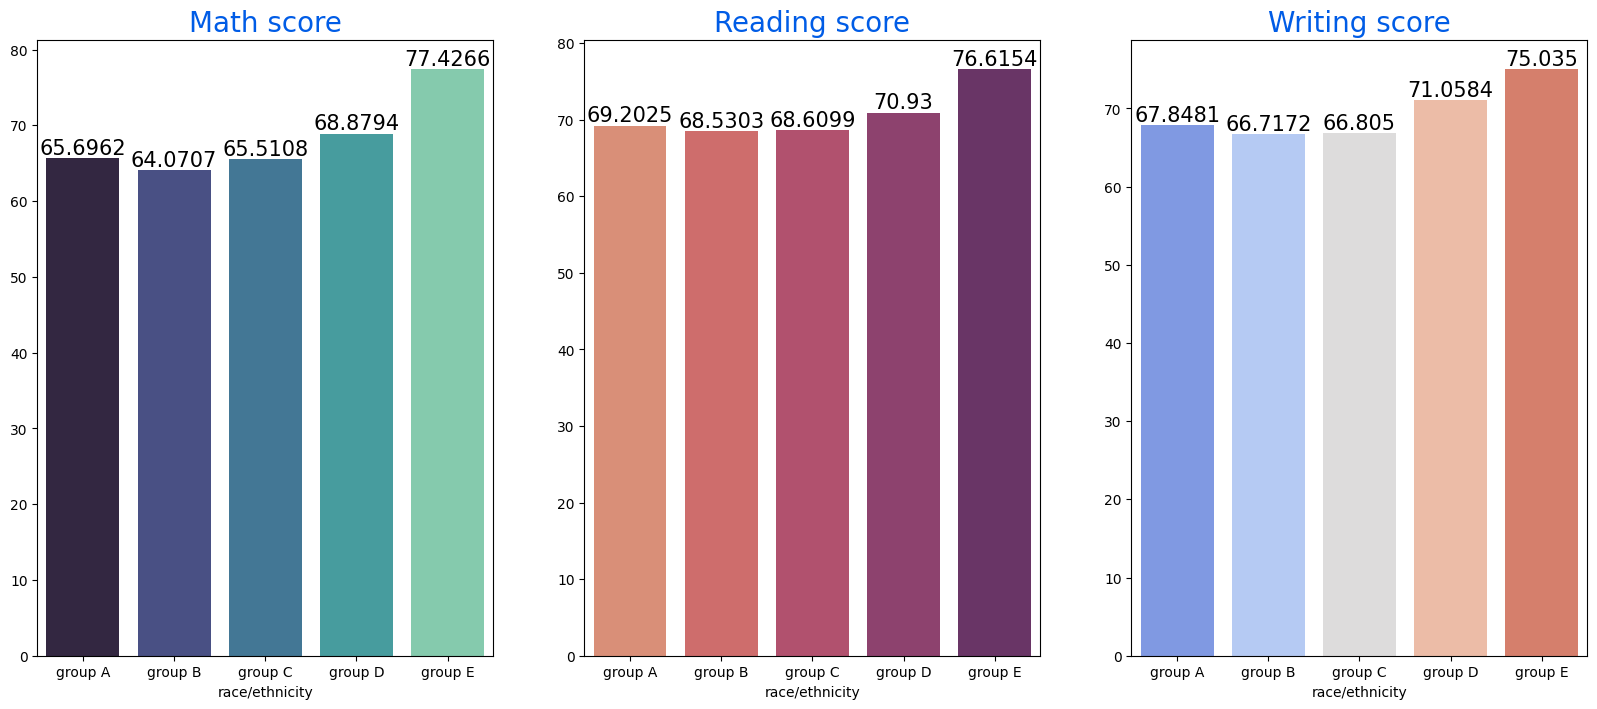

In [27]:
Group_data2=df.groupby('race/ethnicity')
fig, ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insight

Group E students have scored the highest marks.

Group B students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

## 2.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

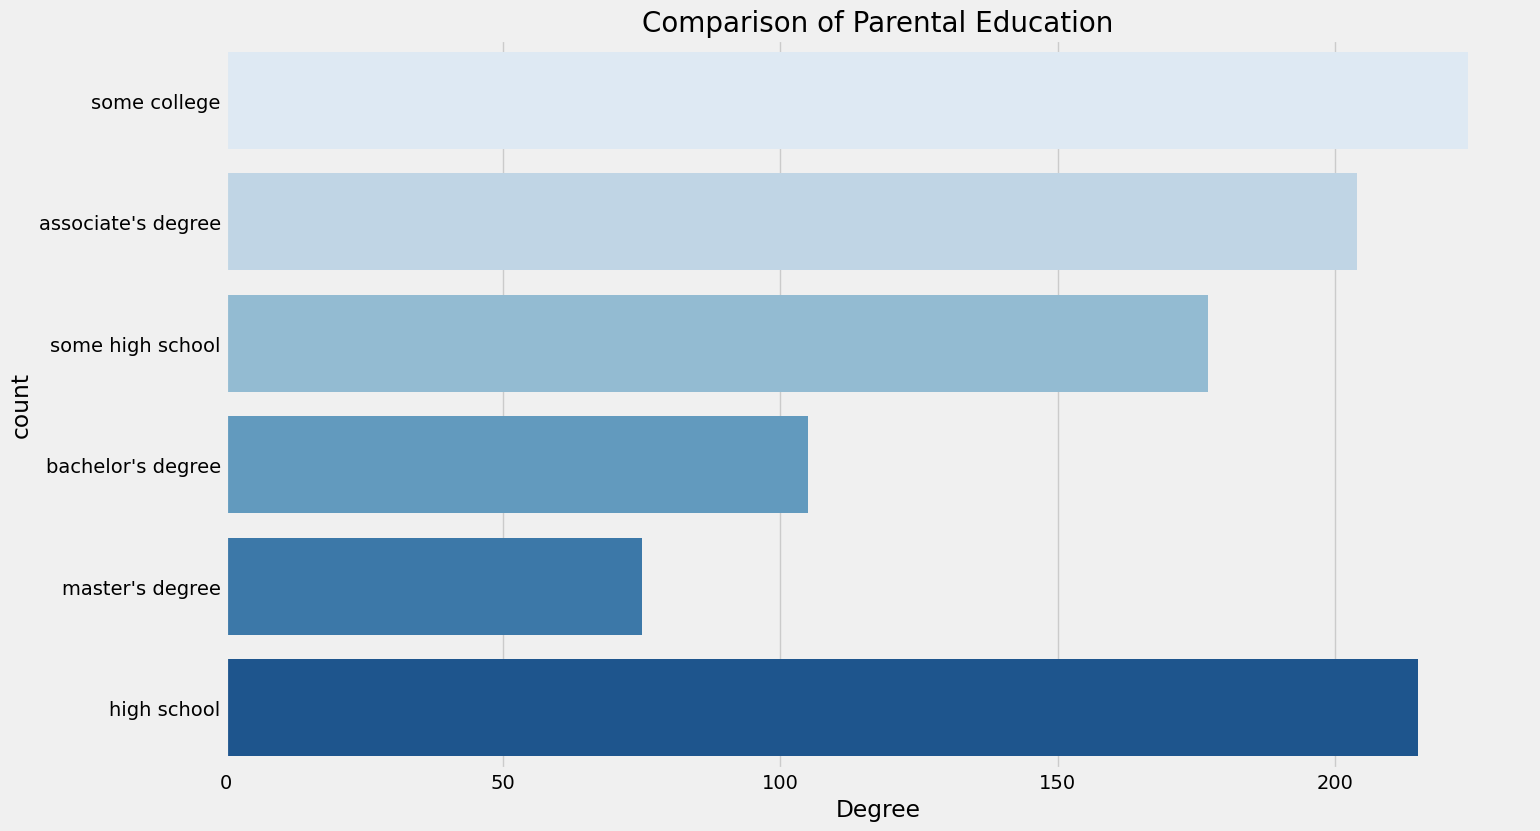

In [28]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

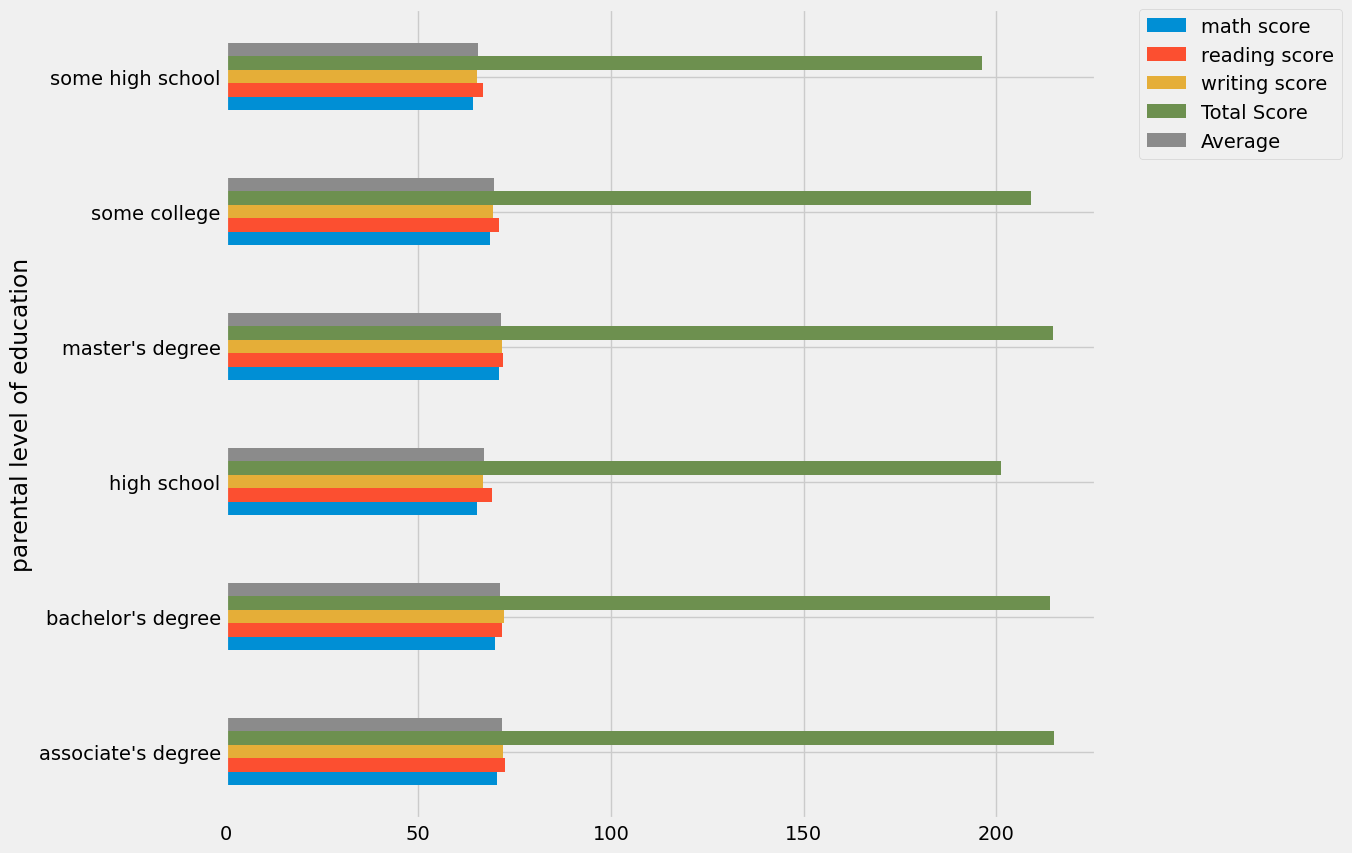

In [29]:
df.groupby('parental level of education')[df.select_dtypes(include='number').columns].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 2.4.4 LUNCH COLUMN

### UNIVARIATE ANALYSIS ( Which type of lunch is most common among students ? )

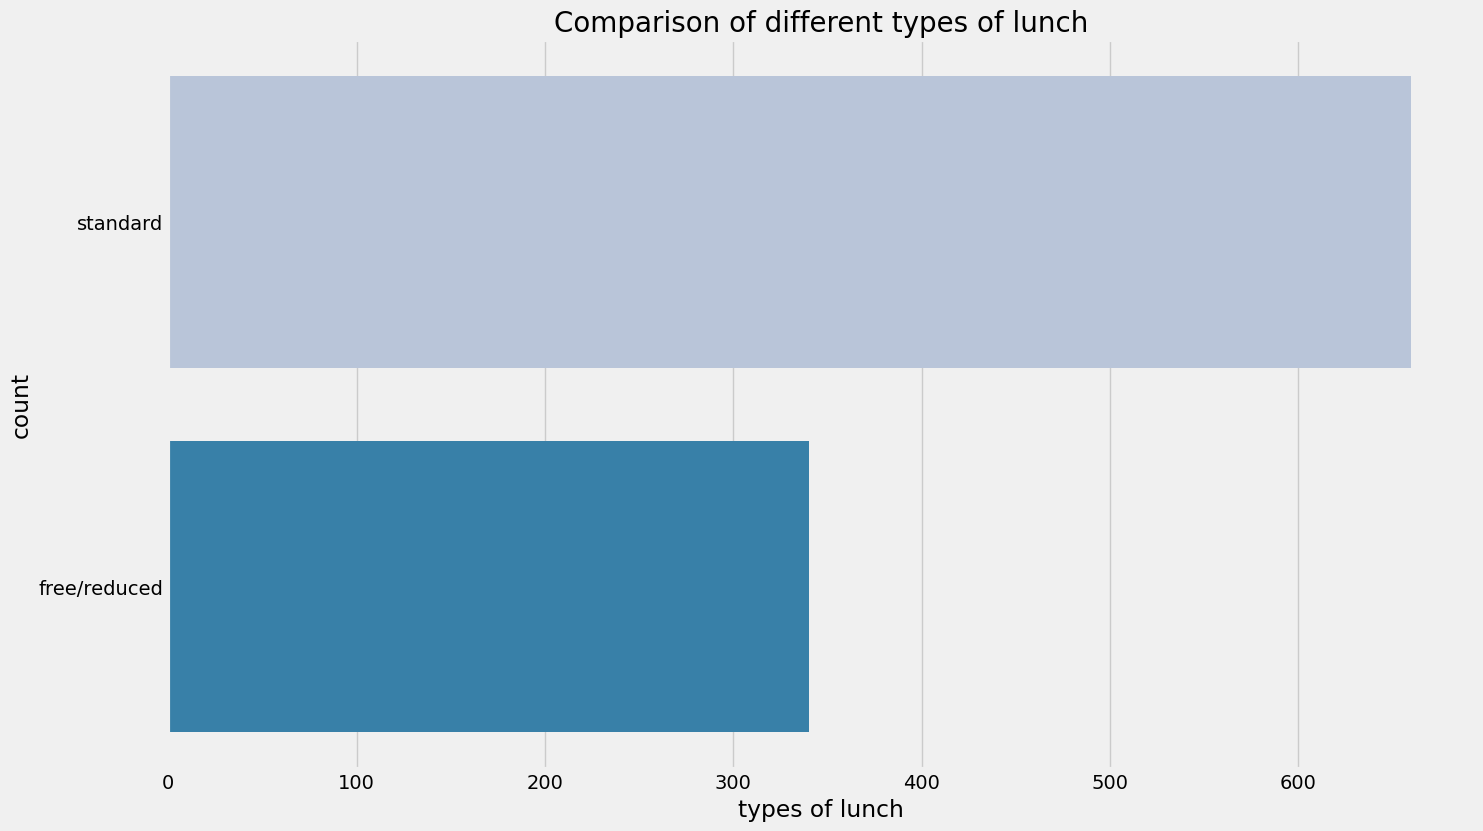

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insight

Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is Lunch and Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

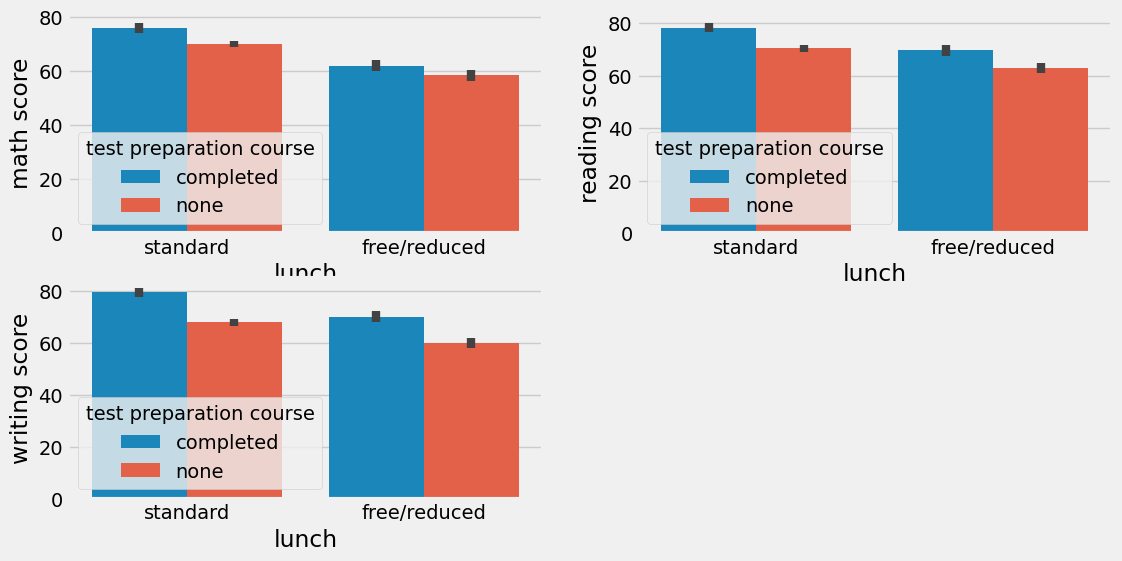

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

## 2.4.5 CHECKING OUTLIERS

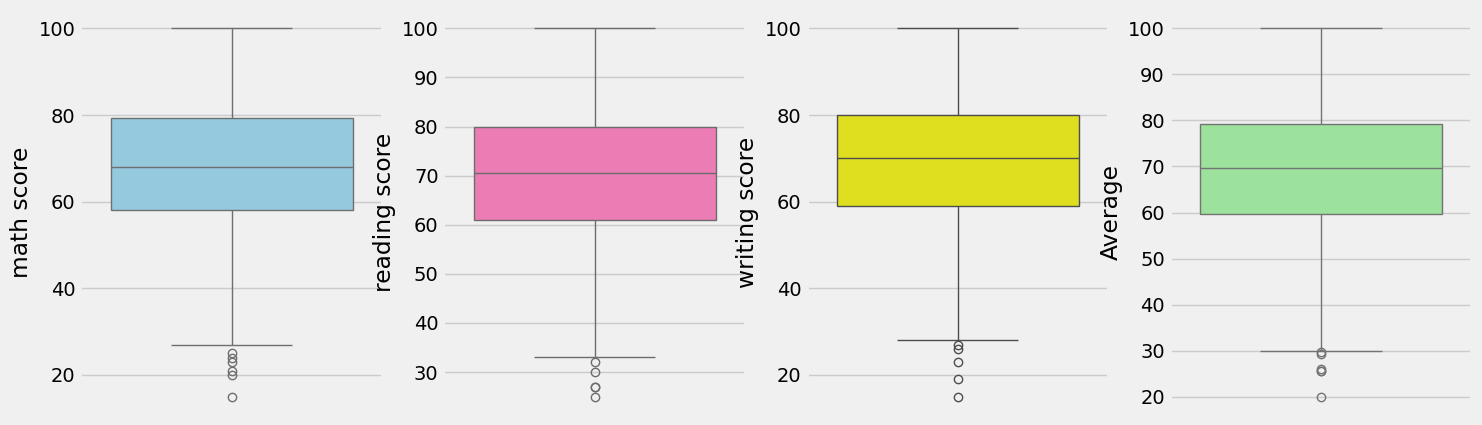

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

## 2.4.6 MUTIVARIATE ANALYSIS USING PAIRPLOT

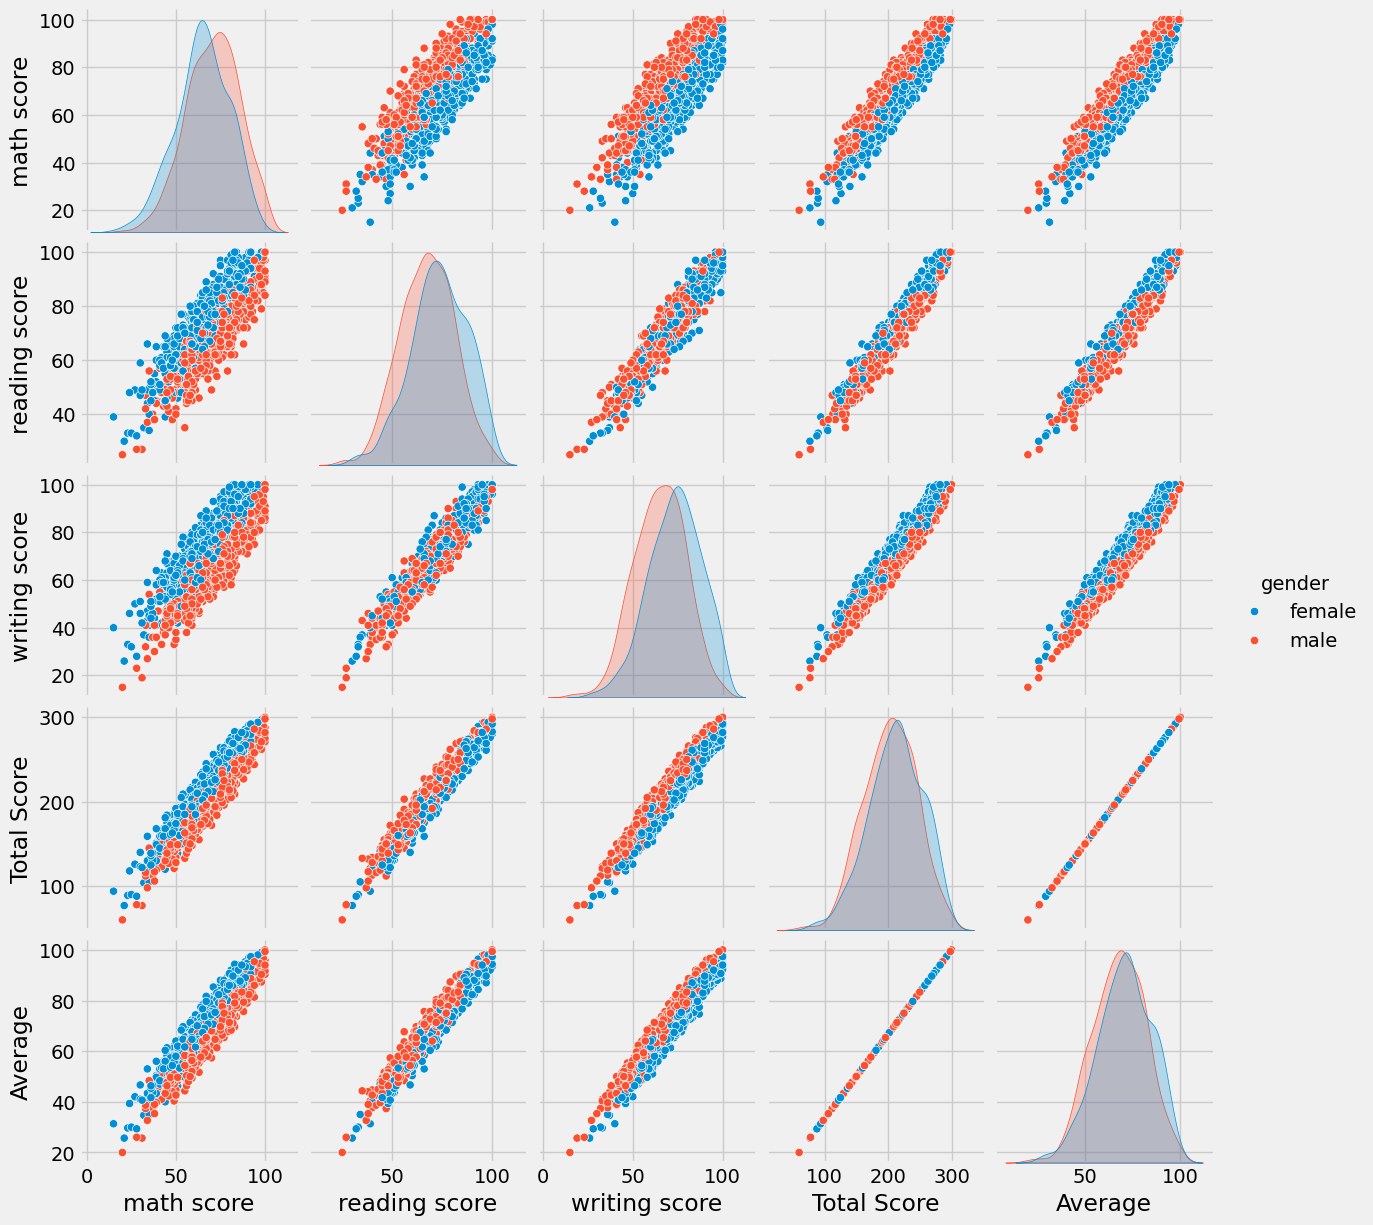

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insight

From the above plot it is clear that all the scores increase linearly with each other.

##  Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course